# **KNN Classifier**

The K-Nearest Neighbors (KNN) classifier is a non-parametric, lazy learning algorithm that classifies data points by determining the majority class among the 'k' closest data points in the feature space, relying on distance metrics like Euclidean distance; its performance is highly dependent on the chosen 'k' value and is sensitive to feature scaling, making it versatile for classification and regression tasks despite requiring the entire training dataset for each prediction.

Choosing the k Value:

**Square Root Rule:**

A common method for choosing k is to use the square root of the total number of data points in your test set.
For example, if you have 110 test data points, you calculate k as √110, which is about 10.5. Since k needs to be a whole number, you'd round it up to 11.

**Odd Number Preference:**

It's better to choose k as an odd number. This is because if k is even, there might be a tie if two classes have the same number of neighbors. For example, if k = 4 and you have two classes of neighbors (Class A and Class B) with 2 neighbors each, the model won't know which class to pick. An odd number helps avoid this tie and ensures a clear decision.

**Experimentation for Performance:**

It's also a good practice to try out different k values and check which one gives the best performance (like accuracy) on your specific dataset. This way, you can find the k that works best for your model.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("/content/drive/MyDrive/datasets/ml/breast-cancer-wisconsin.data")
df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [25]:
df.columns

Index(['id', ' clump_thickness', ' unif_cell_size', ' unif_cell_shape',
       ' marg_adhesion', ' single_epith_cell_size', ' bare_nulei',
       ' bland_chrom', ' norm_nucleoli', ' mitoses', ' class'],
      dtype='object')

In [26]:
df.columns=df.columns.str.strip()
df.columns

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nulei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [27]:
df.columns=df.columns.str.replace(" ","")
df.columns

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nulei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [28]:
for i in df.columns:
  print(df.value_counts(i))

id
1182404     6
1276091     5
1198641     3
769612      2
1339781     2
           ..
1079304     1
1080185     1
1080233     1
1081791     1
13454352    1
Name: count, Length: 645, dtype: int64
clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
unif_cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
unif_cell_shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
marg_adhesion
1     407
2      58
3      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
single_epith_cell_size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
bare_nulei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16

In [29]:
df[df["bare_nulei"]=='?']

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [30]:
df=df[df["bare_nulei"]!='?']
df.bare_nulei.value_counts()

,count
bare_nulei,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
9,9
7,8


In [31]:
df.drop("id",axis=1,inplace=True)
df

<ipython-input-31-b98f97684b71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("id",axis=1,inplace=True)


,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nulei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [32]:
x=df.drop("class",axis=1)
y=df["class"]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
len(y_test)

171

In [39]:
import math
k=int(math.sqrt(len(y_test)))
if k%2==0:
  k+=1
k

13

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [49]:
knn.score(x_test,y_test)

0.9298245614035088

In [51]:
len(df.columns)

10

In [69]:
k_rng=range(1,16)
scores_euc=[]
for i in range(1,16):
  knn_euc=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
  knn_euc.fit(x_train,y_train)
  scores_euc.append(knn_euc.score(x_test,y_test))
  print(i,knn_euc.score(x_test,y_test))

1 0.9415204678362573
2 0.9298245614035088
3 0.9590643274853801
4 0.9415204678362573
5 0.9532163742690059
6 0.9415204678362573
7 0.9473684210526315
8 0.9415204678362573
9 0.9415204678362573
10 0.935672514619883
11 0.935672514619883
12 0.9298245614035088
13 0.9298245614035088
14 0.9298245614035088
15 0.9298245614035088


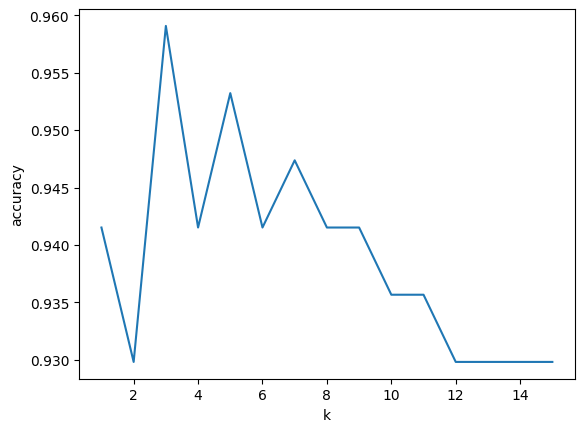

In [70]:
plt.plot(k_rng,scores_euc)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [71]:
scores_man=[]
for i in range(1,16):
  knn_man=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
  knn_man.fit(x_train,y_train)
  scores_man.append(knn_man.score(x_test,y_test))
  print(i,knn_man.score(x_test,y_test))

1 0.9532163742690059
2 0.935672514619883
3 0.9473684210526315
4 0.9473684210526315
5 0.9415204678362573
6 0.9298245614035088
7 0.9415204678362573
8 0.935672514619883
9 0.935672514619883
10 0.9298245614035088
11 0.9298245614035088
12 0.9298245614035088
13 0.9298245614035088
14 0.9298245614035088
15 0.9298245614035088


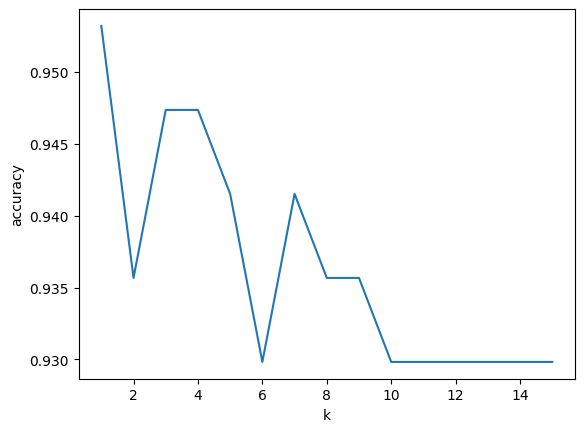

In [80]:
plt.plot(k_rng,scores_man)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [74]:
scores_min=[]
for i in range(1,16):
  knn_min=KNeighborsClassifier(n_neighbors=i,metric="minkowski")
  knn_min.fit(x_train,y_train)
  scores_min.append(knn_min.score(x_test,y_test))
  print(i,knn_min.score(x_test,y_test))

1 0.9415204678362573
2 0.9298245614035088
3 0.9590643274853801
4 0.9415204678362573
5 0.9532163742690059
6 0.9415204678362573
7 0.9473684210526315
8 0.9415204678362573
9 0.9415204678362573
10 0.935672514619883
11 0.935672514619883
12 0.9298245614035088
13 0.9298245614035088
14 0.9298245614035088
15 0.9298245614035088


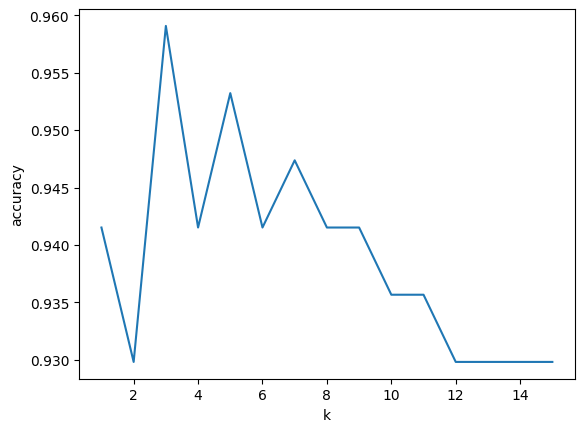

In [81]:
plt.plot(k_rng,scores_min)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

In [78]:
knn_man=KNeighborsClassifier(n_neighbors=3,metric="manhattan")
knn_man.fit(x_train,y_train)
knn_man.score(x_test,y_test)

0.9473684210526315

In [82]:
knn_euc=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn_euc.fit(x_train,y_train)
knn_euc.score(x_test,y_test)

0.9590643274853801

In [83]:
knn_min=KNeighborsClassifier(n_neighbors=3,metric="minkowski")
knn_min.fit(x_train,y_train)
knn_min.score(x_test,y_test)

0.9590643274853801

In [84]:
knn_euc.predict([[4,2,1,1,1,2,3,2,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [85]:
knn_min.predict([[4,2,1,1,1,2,3,2,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [86]:
knn_man.predict([[4,2,1,1,1,2,3,2,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

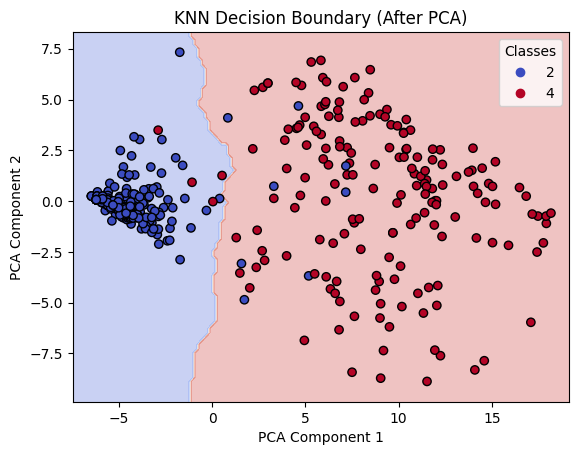

In [87]:
from sklearn.decomposition import PCA

# Reduce features to 2D using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train KNN on PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn.fit(x_train_pca, y_train)

# Create a mesh grid for decision boundary
h = 0.2  # Step size
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KNN Decision Boundary (After PCA)")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


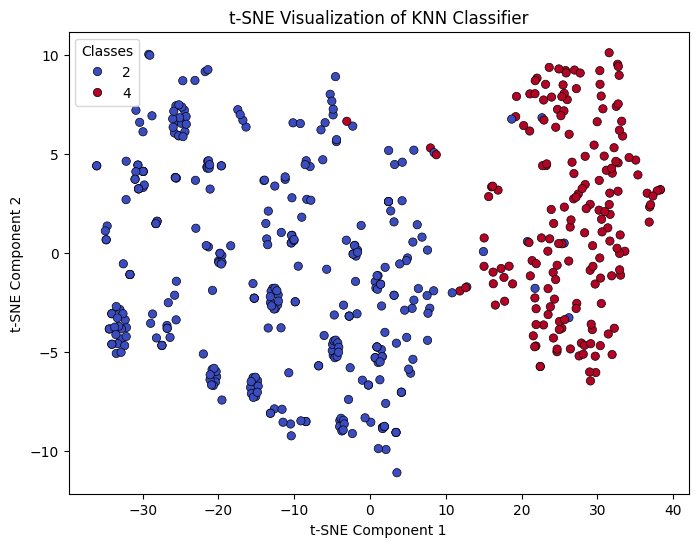

In [88]:
from sklearn.manifold import TSNE

# Reduce features to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train)

# Plot the t-SNE visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_train_tsne[:, 0], y=x_train_tsne[:, 1], hue=y_train, palette="coolwarm", edgecolor="k")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of KNN Classifier")
plt.legend(title="Classes")
plt.show()


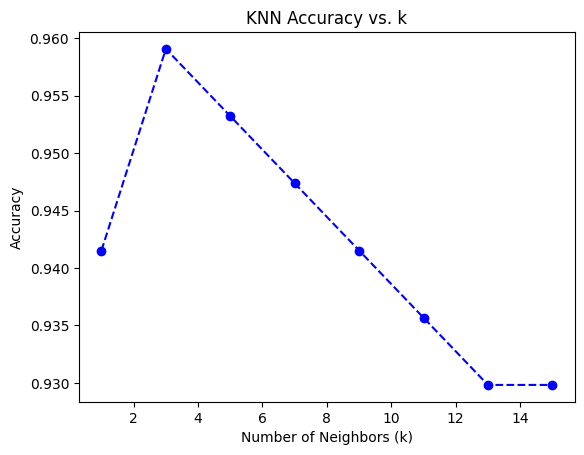

In [89]:
from sklearn.metrics import accuracy_score

# Try different k values and store accuracy
k_values = range(1, 16, 2)  # Odd values from 1 to 15
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.show()
